# Apprentissage par Support Vector Machine (SVM)

Pour ce TP, on s’intéresse aux clients d’une entreprise où l’objectif est de prédire si un client achète ou non un des produits de cette entreprise et ceci sur la base des caractéristiques (features) disponibles sur ce client. Pour cela, on dispose de la table de données « Clients_Achat » contenant des informations relatives à un échantillon de ces clients. Ces informations sont représentées par les caractéristiques suivantes :

*	‘Genre’ : le genre du client (\$/an).
*	‘Age’ : l’âge du client.
*	‘Salaire’ : le salaire du client (\$/an)
*	‘Achat’ : achat du produit (1 si le client achète le produit et 0 sinon).


In [1]:
# Support Vector Machine
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importing the datasets

datasets = pd.read_csv('Clients_Achat.csv')


In [3]:
# Affichage des cinq premières lignes de la table de données.

datasets.head()

,ID,Genre,Age,Salaire,Achat
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Informations relatives aux données de la table

datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Genre    400 non-null    object
 2   Age      400 non-null    int64 
 3   Salaire  400 non-null    int64 
 4   Achat    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Etude descriptive des données de la table

Text(0.5, 0, 'Age')

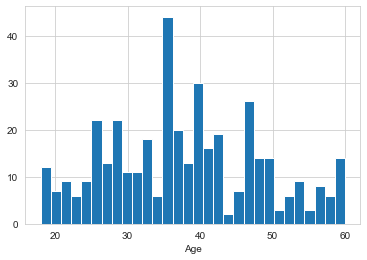

In [5]:
# Histogramme des âges des clients

sns.set_style('whitegrid')
datasets['Age'].hist(bins=30)
plt.xlabel('Age')

Text(0.5, 0, 'Salaire')

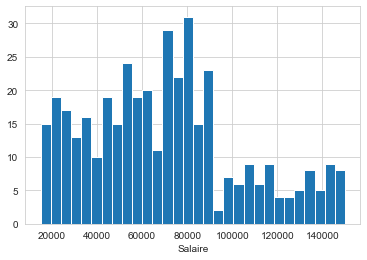

In [6]:
# Histogramme des salaires des clients

sns.set_style('whitegrid')
datasets['Salaire'].hist(bins=30)
plt.xlabel('Salaire')

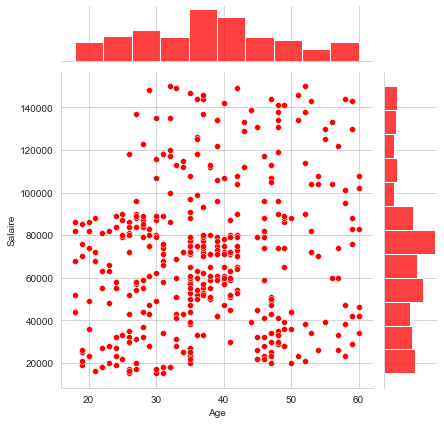

In [7]:
# Graphique représentant le lien entre l'âge et le salaire des clients

sns.jointplot(x='Age',y='Salaire',data=datasets,color='red')

### Etude de la dépedance entre les variables de la table "Clients_Achat"

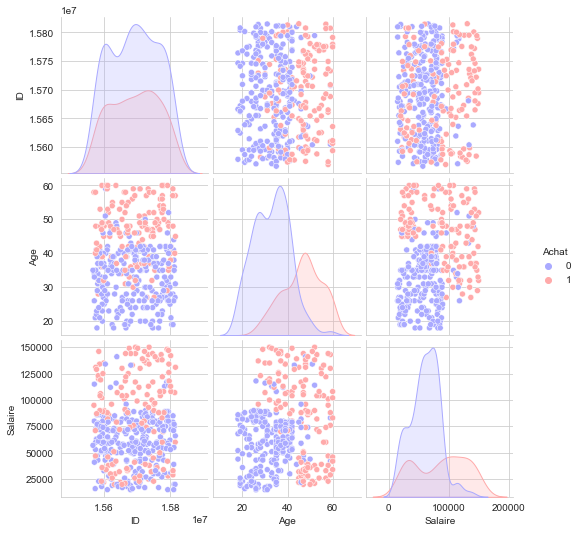

In [8]:
# Graphique du lien entre les caractéristiques de la table "Clients_Achat" et leur distribution observée 
# selon les clients ayant acheté le produit et ceux ne l'ayant pas acheté

sns.pairplot(datasets,hue='Achat',palette='bwr')

In [9]:
# Tests Anova relatifs aux features par rapport à la cible

import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_salaire = ols('Salaire ~ C(Achat)', data=datasets).fit()
Tab_anova_salaire = sm.stats.anova_lm(anova_salaire, typ=2)
Tab_anova_salaire


,sum_sq,df,F,PR(>F)
C(Achat),6.081638e+10,1.0,60.052579,7.772785e-14
Residual,4.030621e+11,398.0,NaN,NaN


In [10]:
anova_age = ols('Age ~ C(Achat)', data=datasets).fit()
Tab_anova_age = sm.stats.anova_lm(anova_age, typ=2)
Tab_anova_age


,sum_sq,df,F,PR(>F)
C(Achat),16988.250031,1.0,251.742061,2.800234e-44
Residual,26858.139969,398.0,NaN,NaN


# Apprentissage par SVM 

In [11]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values


In [12]:
# Echantillons d'Apprentissage et de Test

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [13]:
# Standardisation des caractéristiques

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [14]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)


SVC(kernel='linear', random_state=0)

In [15]:
# Prediction pour l'échantillon de test

Y_Pred = classifier.predict(X_Test)

In [16]:
# Evaluation de la performance 

from sklearn.metrics import classification_report

print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


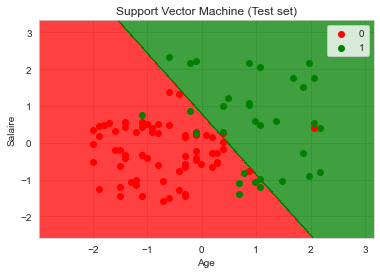

In [43]:
# Visualisation des résultats obtenus avec les données de l'échantillon test

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.legend()
plt.show()

**Prédiction de l'achat du produit pour un nouveau client (1 pour oui et 0 pour non)**

In [40]:
## Prédiction pour une nouvelle entrée de ['Age', 'Salaire']
x_new = np.array([[35, 60000]])
print(x_new)


[[   35 60000]]


In [41]:
Achat_pred = classifier.predict(x_new)
print(Achat_pred)

[1]
